<a href="https://colab.research.google.com/github/rooshanriaz/CS-351L-AI-Lab-GitHub-Repository_2022506/blob/main/Rooshan_Riaz_CS_351L_Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving train.csv to train.csv
Titanic Dataset Information:
Number of samples: 891
Number of features: 12
Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                       

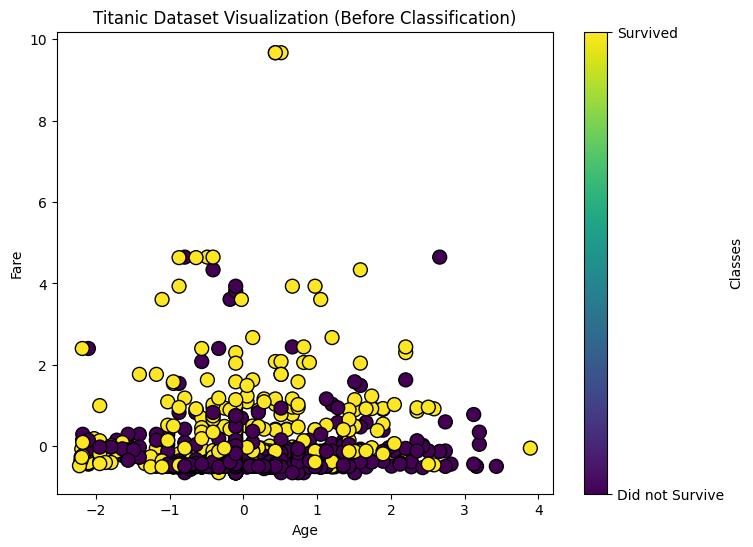

Accuracy of k-NN: 77.99%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.76      0.68      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



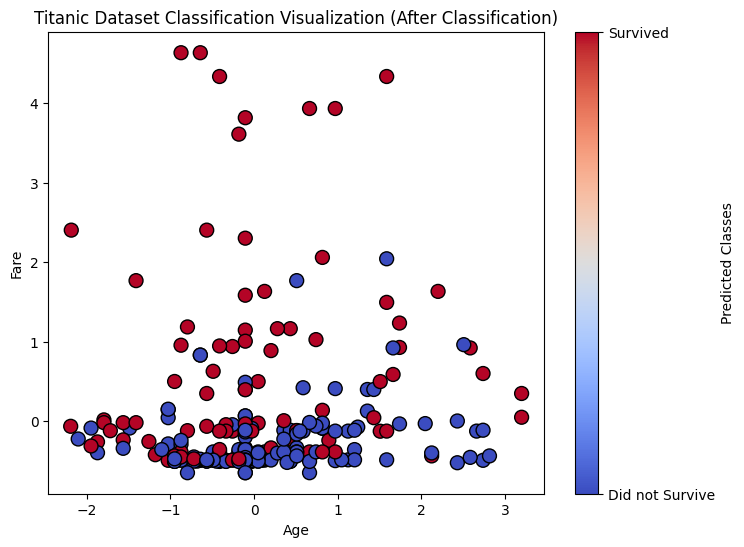

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')

# Display dataset information
print("Titanic Dataset Information:")
print(f"Number of samples: {titanic_data.shape[0]}")
print(f"Number of features: {titanic_data.shape[1]}")
print(f"Missing values per column:\n{titanic_data.isnull().sum()}\n")

# Display the first few rows of the dataset
print(titanic_data.head())

# Data Preprocessing

# Filling missing values: Fill 'Age' with median, 'Embarked' with mode, drop 'Cabin' (too many missing values)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables: 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Drop unnecessary columns: 'PassengerId', 'Name', 'Ticket'
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Define features (X) and target (y)
X = titanic_data.drop(columns=['Survived'])  # Features
y = titanic_data['Survived']  # Target (Survived or not)

# Standardize numerical features: 'Age' and 'Fare'
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# Visualize the dataset before classification (use 'Age' and 'Fare' for 2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(X['Age'], X['Fare'], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('Titanic Dataset Visualization (Before Classification)')
plt.xlabel('Age')
plt.ylabel('Fare')
colorbar = plt.colorbar(label='Classes')
colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Did not Survive', 'Survived'])
plt.show()

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement k-Nearest Neighbors with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)  # Train the k-NN model on the training data

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy of k-NN: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)

# Visualize the dataset after classification (using 'Age' and 'Fare' for 2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Age'], X_test['Fare'], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Titanic Dataset Classification Visualization (After Classification)')
plt.xlabel('Age')
plt.ylabel('Fare')
colorbar = plt.colorbar(label='Predicted Classes')
colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Did not Survive', 'Survived'])
plt.show()


Titanic Dataset Information:
Number of samples: 891
Number of features: 12
Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry  

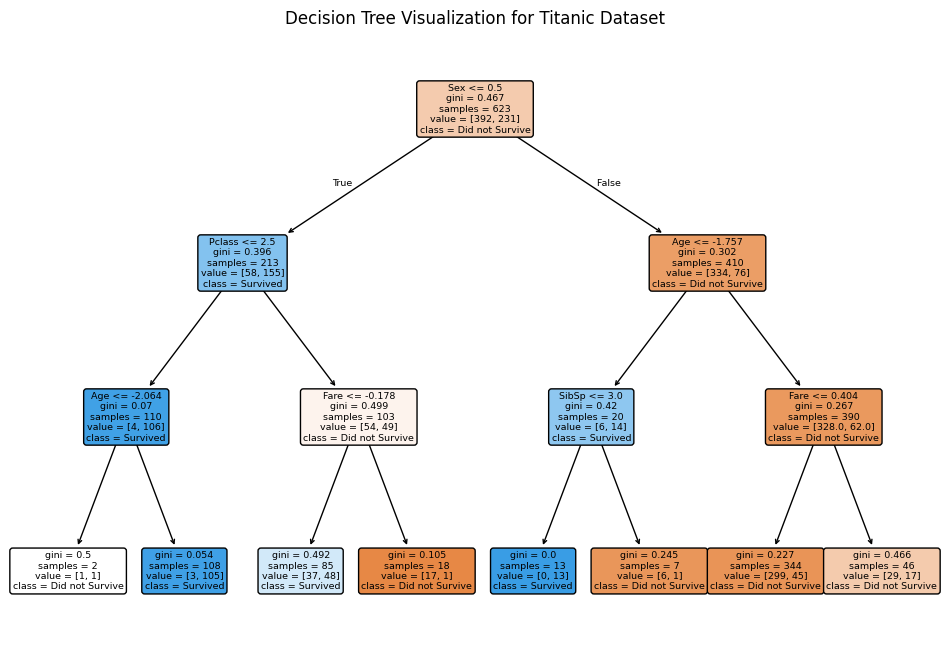

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')

# Display dataset information
print("Titanic Dataset Information:")
print(f"Number of samples: {titanic_data.shape[0]}")
print(f"Number of features: {titanic_data.shape[1]}")
print(f"Missing values per column:\n{titanic_data.isnull().sum()}\n")

# Display the first few rows of the dataset
print(titanic_data.head())

# Data Preprocessing

# Filling missing values: Fill 'Age' with median, 'Embarked' with mode, drop 'Cabin' (too many missing values)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables: 'Sex' and 'Embarked'
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# Drop unnecessary columns: 'PassengerId', 'Name', 'Ticket'
titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Define features (X) and target (y)
X = titanic_data.drop(columns=['Survived'])  # Features
y = titanic_data['Survived']  # Target (Survived or not)

# Standardize numerical features: 'Age' and 'Fare'
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

# Making predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the performance of the Decision Tree
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display accuracy and classification report
print(f"Accuracy of Decision Tree: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)

# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Did not Survive', 'Survived'], rounded=True)
plt.title("Decision Tree Visualization for Titanic Dataset")
plt.show()
